# Machine Learning Sampler

We'll take a quick numerical tour through the four machine learning methods we've looked at so far.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

We'll start with linear regression in 2D, where it's simplest to visualize. We'll suppose that the data are truly linear, and find the best fit via least squares. First, let's plot data drawn from a simple linear model.

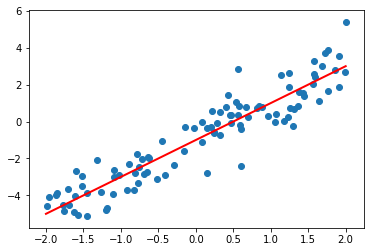

In [5]:
n = 100
b = np.array([[2, -1]]) #Choose the "true" linear model
min_x = -2
max_x = 2

#Generate random samples
xData = np.random.uniform(min_x,max_x,n)
appended = np.ones([1,n])
x = np.vstack((xData, appended))
y = b@x + np.random.randn(1,n)

plt.plot([min_x,max_x], [min_x*b[0,0] + b[0,1], max_x*b[0,0] + b[0,1]],color='r', linestyle='-', linewidth=2)
plt.scatter(x[0,:],y)
plt.show()

Next, let's fit the linear model to the data. How well does the derived linear model agree with the true model?

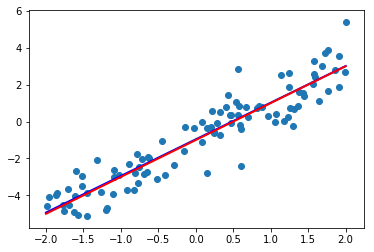

In [6]:
b_star = y@x.T@np.linalg.inv(x@x.T)

plt.plot([min_x,max_x], [min_x*b_star[0,0] + b_star[0,1], max_x*b_star[0,0] + b_star[0,1]],color='b', linestyle='-', linewidth=2)
plt.plot([min_x,max_x], [min_x*b[0,0] + b[0,1], max_x*b[0,0] + b[0,1]],color='r', linestyle='-', linewidth=2)
plt.scatter(x[0,:],y)
plt.show()

As long as we have a few samples, our estimate of the linear function is pretty good. Regression is really quite easy in 2D as long as the data have an inherent linear relationship. The challenge is when the data are high dimensional, or when the relationship is not truly linear.

As an extreme example, look what happens when we try to fit noisy data that has a quadratic relationship.

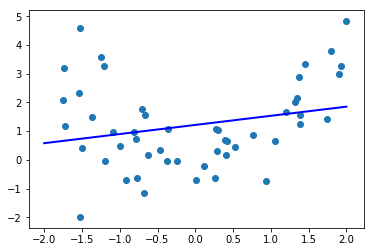

In [7]:
n = 50
min_x = -2
max_x = 2

#Generate random samples
xData = np.random.uniform(min_x,max_x,n)
appended = np.ones([1,n])
x = np.vstack((xData, appended))
y = xData**2 + np.random.randn(1,n)

b_star = y@x.T@np.linalg.inv(x@x.T)
plt.plot([min_x,max_x], [min_x*b_star[0,0] + b_star[0,1], max_x*b_star[0,0] + b_star[0,1]],color='b', linestyle='-', linewidth=2)

plt.scatter(x[0,:],y)
plt.show()

A popular choice for solving regression problems in this case is **kernel methods**. These methods map the data to a high-dimensional space by taking polynomial (or other) functions of the data and fitting a linear model to the higher-dimensional data. In this way, non-linear curves of best fit can be derived from the data.

## Logistic Regresssion
Next, we'll look at logistic regresssion. In particular, we will learn a binary classifier for the MNIST dataset, just between classes '0' and '1'.

CURRENT COST: [[ 0.69314718]]
CURRENT COST: [[ 0.06919805]]
CURRENT COST: [[ 0.00508817]]
CURRENT COST: [[ 0.00198716]]
CURRENT COST: [[ 0.00123447]]
CURRENT COST: [[ 0.00091629]]
CURRENT COST: [[ 0.00074645]]
CURRENT COST: [[ 0.00063694]]
CURRENT COST: [[ 0.00055995]]
CURRENT COST: [[ 0.00050257]]


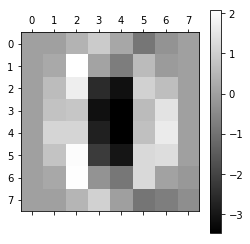

In [15]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=2)
images = digits.images
targets = digits.target

b = np.zeros([64+1,1])
NUM_ITERATIONS = 10

#take the gradient descent steps
for t in range(0,NUM_ITERATIONS):
    #evaluate the cost function at the current iteration
    L = 0
    for i in range(0,len(targets)):
        x = np.array([images[i].flatten()]).T
        x = np.vstack((x,[1]))
        
        L -= (1/len(targets))*((1-targets[i])*b.T@x - np.log(1+np.exp(b.T@x)))
    print("CURRENT COST: " + str(L))
    
    alpha = np.sqrt(1/(t+1)) #stepsize
    g = np.zeros([64+1,1])
    for i in range(0,len(targets)):
        x = np.array([images[i].flatten()]).T
        x = np.vstack((x,[1]))
        
        g -= (1/len(targets))*x*((1-targets[i]) - np.exp(b.T@x)/(1+np.exp(b.T@x)))
    b -= alpha*g
    
b_image = np.reshape(b[:64],(8,8))
plt.matshow(b_image,cmap=plt.cm.gray) 
plt.colorbar()
plt.show()

Sure enough, the gradient iterations converge on a solution, which has very small empirical cost.

We can get an intuition for the classifier that we learn from logistic regression by plotting it as an image as above. Note that the final classifier picks out pixels that are more likely to correspond to a 0 and 1, and weights them accordingly. High weights correspond to a large value of the log-odds, which corresponds to a '0' classification.

## Principal Components Analysis (PCA)
Next, we'll try out principal components analysis, again on the MNIST data. We'll grab *all* of the images in the dataset and fit a low-dimensional model. We'll plot the principal components, then we'll see how well we can reconstruct an image from its PCA representation.

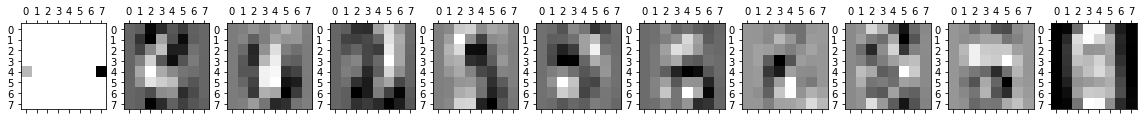

In [16]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
images = digits.images

K = np.zeros([64,64])
mu = np.mean(images,0)
for i in range(0,len(images)):
    x = images[i].flatten() - mu.flatten()
    K = K + 1/len(images)*np.outer(x,x)

d, V = np.linalg.eigh(K)

NUM_COMPONENTS = 10
fig, axs = plt.subplots(ncols=NUM_COMPONENTS+1, figsize=(20, 20))
for i in range(0,NUM_COMPONENTS):
    this_component = np.reshape(V[:,-i],[8,8])
    axs[i].matshow(this_component,cmap=plt.cm.gray) 
axs[NUM_COMPONENTS].matshow(mu,cmap=plt.cm.gray)
plt.show()

The mean component (displayed last) shows that most of the non-zero pixel values are in the center of the frame, as expected. The principal components give the image prototypes that best explain the variance between different images. In principal, we can construct an image of any digit type by taking linear combinations of these elements. The more principal components we take, the more faithful the representation using these elements.

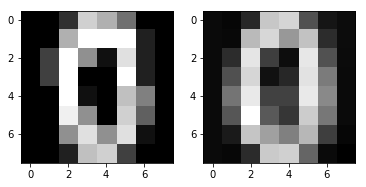

In [30]:
NUM_COMPONENTS = 5
Vp = V[:,-NUM_COMPONENTS:]
image_index = 20

x = images[image_index].flatten() - mu.flatten()
x_reconstructed = np.reshape(Vp@Vp.T@x,[8,8]) + mu

fig, axs =plt.subplots(ncols=2)
axs[0].imshow(images[image_index],cmap=plt.cm.gray,interpolation="nearest")
axs[1].imshow(x_reconstructed,cmap=plt.cm.gray,interpolation="nearest")
plt.show()

## k-means clustering
Finally, we'll try k-means, generating some random data and seeing if we can cluster it into two clumps. We'll start with two isotropic Gaussians with different means. We'll see that k-means makes quick work of the problem.

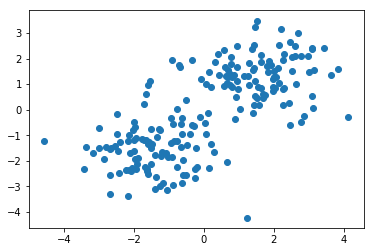

In [38]:
NUM_SAMPLES = 100
mu_0 = [1.5, 1.5]
mu_1 = [-1.5, -1.5]

x_0 = np.array([mu_0]).T + np.random.randn(2,NUM_SAMPLES)
x_1 = np.array([mu_1]).T + np.random.randn(2,NUM_SAMPLES)
x = np.hstack((x_0,x_1))

plt.scatter(x[0,:],x[1,:])
plt.show()

Now, let's see if we can cluster this data. We'll start with randomly generated centroids, and then we'll do each iteration of k-means.

In [39]:
targets = np.random.randint(2, size=2*NUM_SAMPLES)

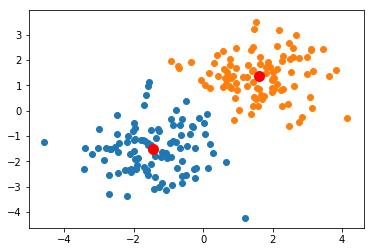

In [43]:
#re-compute the centroids
indices_0 = (targets == 0)
these_points = x[:,indices_0]
u_0 =  np.mean(these_points,1)

indices_1 = (targets == 1)
these_points = x[:,indices_1]
u_1 =  np.mean(these_points,1)

#and re-cluster the data points
for i in range(0,2*NUM_SAMPLES):
    if (np.linalg.norm(x[:,i] - u_0) < np.linalg.norm(x[:,i] - u_1)):
        targets[i] = 0
    else:
        targets[i] = 1

plt.scatter(x[0,indices_0],x[1,indices_0])
plt.scatter(x[0,indices_1],x[1,indices_1])
plt.plot(u_0[0], u_0[1], marker='o', markersize=10, color="red")
plt.plot(u_1[0], u_1[1], marker='o', markersize=10, color="red")

plt.show()

Honestly, this is too easy. As long as the clusters are obvious, k-means will usually do a good job of finding them. Let's look at a more challenging clustering problem in which the data obviously cluster to the human eye, but not so obviously to k-means.

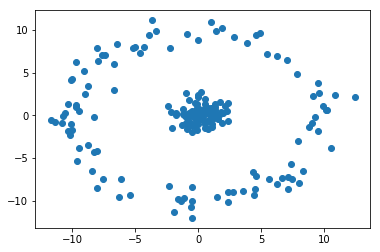

In [44]:
NUM_SAMPLES = 100
radius = 10
x_0 = np.random.randn(2,NUM_SAMPLES)
phases = 2*np.pi*np.random.uniform(size=NUM_SAMPLES)
x_1 = radius*np.vstack((np.cos(phases),np.sin(phases))) + np.random.randn(2,NUM_SAMPLES)
x = np.hstack((x_0,x_1))

plt.scatter(x[0,:],x[1,:])
plt.show()

How well does this cluster?

In [59]:
targets = np.random.randint(2, size=2*NUM_SAMPLES)

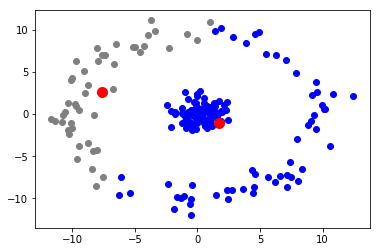

In [70]:
#re-compute the centroids
indices_0 = (targets == 0)
these_points = x[:,indices_0]
u_0 =  np.mean(these_points,1)

indices_1 = (targets == 1)
these_points = x[:,indices_1]
u_1 =  np.mean(these_points,1)

#and re-cluster the data points
for i in range(0,2*NUM_SAMPLES):
    if (np.linalg.norm(x[:,i] - u_0) < np.linalg.norm(x[:,i] - u_1)):
        targets[i] = 0
    else:
        targets[i] = 1

plt.scatter(x[0,indices_0],x[1,indices_0], color="gray")
plt.scatter(x[0,indices_1],x[1,indices_1], color="blue")
plt.plot(u_0[0], u_0[1], marker='o', markersize=10, color="red")
plt.plot(u_1[0], u_1[1], marker='o', markersize=10, color="red")

plt.show()

This doesn't work so well, because the data don't separate well linearly. The algorithm does well to choose the origin as a mean, but there is no way for it to describe a cluster in which the outer ring is separated from the inner cluster. We can make this possible by a simple example of **feature engineering**. We will take as a feature the radius (squared) of each data point, and allow k-means to cluster the data according to the radius, too. This will dramatically improve performance on this dataset.

In [72]:
x_augmented = np.vstack((x[0,:],x[1,:],x[0,:]**2 + x[1,:]**2))
targets = np.random.randint(2, size=2*NUM_SAMPLES)

[  -1.01937715   -0.54005997  101.62185585]
[ 0.17584838  0.08722308  1.96535832]


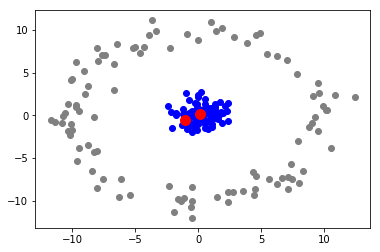

In [78]:
#re-compute the centroids
indices_0 = (targets == 0)
these_points = x_augmented[:,indices_0]
u_0 =  np.mean(these_points,1)

indices_1 = (targets == 1)
these_points = x_augmented[:,indices_1]
u_1 =  np.mean(these_points,1)

#and re-cluster the data points
for i in range(0,2*NUM_SAMPLES):
    if (np.linalg.norm(x_augmented[:,i] - u_0) < np.linalg.norm(x_augmented[:,i] - u_1)):
        targets[i] = 0
    else:
        targets[i] = 1

print(u_0)
print(u_1)
plt.scatter(x_augmented[0,indices_0],x_augmented[1,indices_0], color="gray")
plt.scatter(x_augmented[0,indices_1],x_augmented[1,indices_1], color="blue")
plt.plot(u_0[0], u_0[1], marker='o', markersize=10, color="red")
plt.plot(u_1[0], u_1[1], marker='o', markersize=10, color="red")

plt.show()

By telling the algorithm that the radius may be an important feature to use for telling apart the clusters, we've turned an intractable clustering problem into an easy one.

Finally, let's try clustering real-world data. How well do the MNIST digits cluster?

In [84]:
from sklearn.datasets import load_digits
NUM_IMAGES = 50
digits = load_digits(n_class=2)
images = digits.images[:NUM_IMAGES,:,:]

targets = np.random.randint(2, size=NUM_IMAGES)

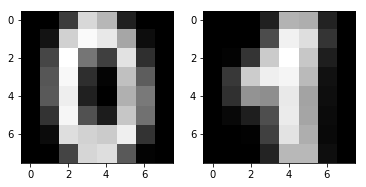

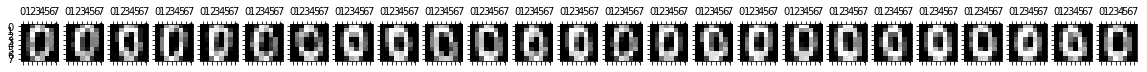

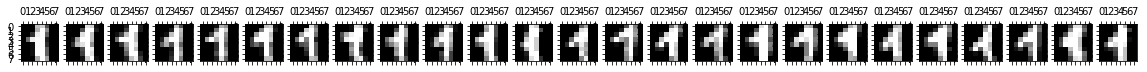

In [88]:
#re-compute the centroids
indices_0 = np.flatnonzero(targets == 0)
these_points = images[indices_0]
u_0 =  np.mean(these_points,0)

indices_1 = np.flatnonzero(targets == 1)
these_points = images[indices_1]
u_1 =  np.mean(these_points,0)

#and re-cluster the data points
for i in range(0,NUM_IMAGES):
    if (np.linalg.norm(images[i].flatten() - u_0.flatten()) < np.linalg.norm(images[i].flatten() - u_1.flatten())):
        targets[i] = 0
    else:
        targets[i] = 1

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(u_0,cmap=plt.cm.gray,interpolation="nearest")
axs[1].imshow(u_1,cmap=plt.cm.gray,interpolation="nearest")
plt.show()

fig, axs = plt.subplots(ncols=len(indices_0), figsize=(20, 20))
for i in range(0,len(indices_0)):
    axs[i].matshow(images[indices_0[i]],cmap=plt.cm.gray) 
plt.show()

fig, axs = plt.subplots(ncols=len(indices_1), figsize=(20, 20))
for i in range(0,len(indices_1)):
    axs[i].matshow(images[indices_1[i]],cmap=plt.cm.gray) 
plt.show()

With only two classes, clustering even higher-dimensional signals works pretty well!